<a href="https://colab.research.google.com/github/meryemaali/projetBDC/blob/main/projet_BDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tweepy
from tweepy import API
from tweepy import Cursor
from tweepy import Stream
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler


import numpy as np
import pandas as pd



In [2]:
consumerKey = '729qJ4Aj9SawJ3tcd7XQnPsgD' 
consumerSecret = 'xYweEiRy9I6TPo9z1lVAgYgtvhvekDv0yuy0fabsmbmbajFPju'
accessToken = '1481675203998633988-9KvnDb27YcBNcwWJqhfeL720MPCOSw'
acessTokenSecret = 'cUzKpFsnJbF3jEQ67IQKlsg519T5c2r0WnAQ2RCDCJxka'

In [3]:
auth = tweepy.OAuthHandler(consumerKey , consumerSecret)
auth.set_access_token(accessToken,acessTokenSecret)
api = tweepy.API(auth)

In [4]:
for tweet in api.search('Trump'):
  print(tweet.text)


@GOP @PARISDENNARD That probably helped trump.
RT @robreiner: As we sit here, our Democracy and our Planet are being destroyed. If we want to save our Planet, we must save our Democracy.…
RT @theliamnissan: There's a Trump rally in Arizona tonight, jus sayin. https://t.co/NYHaHzfZoY
RT @OccupyDemocrats: BREAKING: Georgia’s REPUBLICAN Lieutenant Governor Geoff Duncan blasts Trump, calls him a “liar” who “stoked the fire”…
RT @RonFilipkowski: Maybe people have commented on the ‘Blacks for Trump’ people behind him. They have been at every rally for years and ar…
PRESIDENT DONALD TRUMP RALLY LIVE IN FLORENCE, AZ 1/15/22 https://t.co/OXOfnCfym5
RT @duty2warn: Flynn is at it again. Remember when Sally Yates warned that Flynn was being blackmailed? When Obama warned Trump about Flynn…
@AdamKinzinger Most of Obama's base would never give a low IQ dirtbag like Trump the time of day.
⁦@AZGOP⁩ 

Either your party is too incompetent to run elections, which makes you unfit to manage elections…or Tr

In [5]:
df= pd.DataFrame(columns= ['Tweets', 'Tweet_id', 'User', 'User_id', 'User_statuses_count','User_followers','User_friends_count','User_location','fav_count',
                           'rt_count','tweet_data', 'User_verified'])

In [6]:
def stream(data , file_name):
  i = 0
  for tweet in tweepy.Cursor(api.search , q=data , count=100, lang='en').items():
    df.loc[i , 'Tweets']=tweet.text
    df.loc[i, 'Tweets.id']=tweet.id
    df.loc[i, 'User']=tweet.user.name
    df.loc[i, 'User_id']=tweet.user.id
    df.loc[i, 'User_statuses_count']=tweet.user.statuses_count
    df.loc[i, 'User_followers']=tweet.user.followers_count
    df.loc[i, 'User_friends_count']=tweet.user.friends_count
    df.loc[i, 'User_location']=tweet.user.location
    df.loc[i, 'fav_count']=tweet.favorite_count
    df.loc[i, 'rt_count']=tweet.retweet_count
    df.loc[i, 'tweet_data']=tweet.created_at
    df.loc[i, 'User_verified']=tweet.user.verified
    df.to_csv('{}.csv'.format(file_name))
    i=i+1
    if i == 1000:
      break
    else :
      pass

In [7]:
stream(data =['Trump'], file_name = 'my_tweets_2K')
df.head()

,Tweets,Tweet_id,User,User_id,User_statuses_count,User_followers,User_friends_count,User_location,fav_count,rt_count,tweet_data,User_verified,Tweets.id
0,"RT @robreiner: As we sit here, our Democracy a...",NaN,lacychic,436993909,8602,28,161,"Minnesota, USA",0,1699,2022-01-16 16:53:07,False,1.482758e+18
1,RT @JackPosobiec: Trump calls for a boycott of...,NaN,Aldoro Gallstone,41548012,109450,585,202,West Texas,0,4098,2022-01-16 16:53:07,False,1.482758e+18
2,RT @ColumbiaBugle: President Trump Demanding A...,NaN,Lori Homann,27176423,504,60,243,"Wisconsin, USA",0,1965,2022-01-16 16:53:06,False,1.482758e+18
3,RT @kazweida: I thought we’d learned this less...,NaN,"Irene, the Mage of Mind",424308649,21933,161,425,Realm of Insanity,0,22,2022-01-16 16:53:06,False,1.482758e+18
4,RT @Strandjunker: “Blacks for Trump” is like “...,NaN,Cindy Frederic,260476790,9904,141,1533,Florida,0,764,2022-01-16 16:53:06,False,1.482758e+18


In [8]:
from textblob import TextBlob
from wordcloud import WordCloud , STOPWORDS

In [9]:
import re
def clean_tweet(tweet):
  tweet = re.sub(r'@[A-Za-z0-9]+' , '' , tweet) #Removed @mentions
  tweet = re.sub(r'#', '' , tweet) #Removing the '#' symbol
  tweet = re.sub(r'RT[\s]+','',tweet)  #Removing RT
  tweet = re.sub(r'https?:\/\/\S+' , '' , tweet) #remove the hyper Link

  return tweet

In [10]:
def analyze_sentiment(tweet):
  analysis = TextBlob(tweet)
  if analysis.sentiment.polarity > 0 :
    return '4'
  elif analysis.sentiment.polarity == 0:
    return '2'
  else : 
    return '0'
    

In [11]:
df['clean_tweet'] = df['Tweets'].apply(lambda x: clean_tweet(x))
df['Sentiment'] = df['clean_tweet'].apply(lambda x : analyze_sentiment(x))

In [12]:
n=12
print('Clean Original Tweet:\n' + df['Tweets'][n])
print('Clean Tweet :\n' + df['clean_tweet'][n])
print('Sentiment:\n' + df['Sentiment'][n])

Clean Original Tweet:
RT @GeoffRBennett: NPR: Trump officials interfered with the 2020 census beyond cutting it short, email shows https://t.co/RgMg8WywmR
Clean Tweet :
: NPR: Trump officials interfered with the 2020 census beyond cutting it short, email shows 
Sentiment:
0


In [13]:
print(df['Sentiment'].unique())
df['Sentiment'] = df['Sentiment'].astype(int)
print(df['Sentiment'].unique())
print(df['Sentiment'].value_counts())

['2' '4' '0']
[2 4 0]
2    443
4    298
0    259
Name: Sentiment, dtype: int64


In [14]:
all_tweets = ' '.join(tweet for tweet in df['clean_tweet'])

In [15]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(all_tweets)

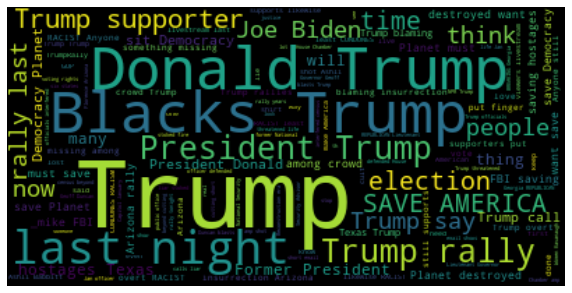

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10,10))
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis("off")
plt.show()

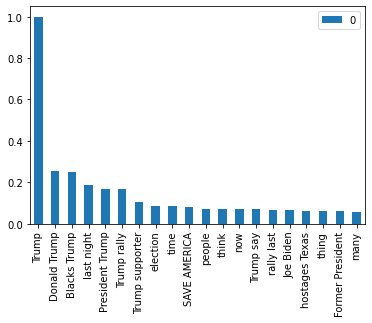

In [17]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq = df_freq.head(20)
df_freq.plot.bar()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tweets               1000 non-null   object 
 1   Tweet_id             0 non-null      object 
 2   User                 1000 non-null   object 
 3   User_id              1000 non-null   object 
 4   User_statuses_count  1000 non-null   object 
 5   User_followers       1000 non-null   object 
 6   User_friends_count   1000 non-null   object 
 7   User_location        1000 non-null   object 
 8   fav_count            1000 non-null   object 
 9   rt_count             1000 non-null   object 
 10  tweet_data           1000 non-null   object 
 11  User_verified        1000 non-null   object 
 12  Tweets.id            1000 non-null   float64
 13  clean_tweet          1000 non-null   object 
 14  Sentiment            1000 non-null   int64  
dtypes: float64(1), int64(1), object(13)
mem

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
!pip install -q findspark

In [21]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-1.8.0-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [22]:
import findspark
findspark.init()

In [23]:
from pyspark.sql import SparkSession

In [24]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.classification  import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer , StopWordsRemover


In [25]:
#create Spark Session
appName = "Sentiment Analysis in Spark"
spark = SparkSession.builder.appName(appName).config("spark.some.config.option" , "some-value").getOrCreate()


In [26]:
tweets_csv = spark.createDataFrame(df)
tweets_csv.printSchema()
tweets_csv.show(truncate=False , n=10)


root
 |-- Tweets: string (nullable = true)
 |-- Tweet_id: double (nullable = true)
 |-- User: string (nullable = true)
 |-- User_id: long (nullable = true)
 |-- User_statuses_count: long (nullable = true)
 |-- User_followers: long (nullable = true)
 |-- User_friends_count: long (nullable = true)
 |-- User_location: string (nullable = true)
 |-- fav_count: long (nullable = true)
 |-- rt_count: long (nullable = true)
 |-- tweet_data: timestamp (nullable = true)
 |-- User_verified: boolean (nullable = true)
 |-- Tweets.id: double (nullable = true)
 |-- clean_tweet: string (nullable = true)
 |-- Sentiment: long (nullable = true)

+--------------------------------------------------------------------------------------------------------------------------------------------+--------+-----------------------+-------------------+-------------------+--------------+------------------+-----------------+---------+--------+-------------------+-------------+----------------------+-----------------------

In [27]:
#selecting clean_tweets and Sentiment Variables
data = tweets_csv.select("clean_tweet" , col("Sentiment").cast("Int").alias("label"))
data.show(truncate = False , n=10)

+--------------------------------------------------------------------------------------------------------------------------------+-----+
|clean_tweet                                                                                                                     |label|
+--------------------------------------------------------------------------------------------------------------------------------+-----+
|: As we sit here, our Democracy and our Planet are being destroyed. If we want to save our Planet, we must save our Democracy.… |2    |
|: Trump calls for a boycott of AT&amp;T over them dropping One America News from DirecTV                                        |2    |
|: President Trump Demanding Answers About Ray Epps And How Many Federal Informants Were Present At The Capitol On January…      |4    |
|: I thought we’d learned this lesson but I guess not. Please don’t just tweet Trump quotes from last night’s rally without prov…|2    |
|: “Blacks for Trump” is like “Women for 

In [28]:
#divide data , 70% for training , 30% for testing
dividedData = data.randomSplit([0.7 , 0.3])
trainingData = dividedData[0]
testingData = dividedData[1]
train_rows = trainingData.count()
test_rows = testingData.count()
print("Training Data rows : " , train_rows , "; Testing Data rows : ", test_rows)


Training Data rows :  682 ; Testing Data rows :  318


In [29]:
tokenizer = Tokenizer(inputCol="clean_tweet" , outputCol="SentimentWords")
tokenizedTrain = tokenizer.transform(trainingData)
tokenizedTrain.show(truncate=False , n=10)

+------------------------------------------------------------------------------------------+-----+-------------------------------------------------------------------------------------------------------------+
|clean_tweet                                                                               |label|SentimentWords                                                                                               |
+------------------------------------------------------------------------------------------+-----+-------------------------------------------------------------------------------------------------------------+
|  

A TRUMPER ACCUSING SOMEONE OF BELIEVING CONSPIRACIES? A TRUMPER?…                     |2    |[, , , , a, trumper, accusing, someone, of, believing, conspiracies?, a, trumper?…]                          |
|       TEXANS 

IMPORTANT RACES of 2022 

HAS🤔
TRUM…                                     |4    |[, , , , , , , texans, , , important, races, of, 2022, , , has🤔, tr

In [30]:
swr = StopWordsRemover(inputCol=tokenizer.getOutputCol(), outputCol="MeaningfulWords")
swRemovedTrain = swr.transform(tokenizedTrain)
swRemovedTrain.show(truncate=False , n =10)

+------------------------------------------------------------------------------------------+-----+-------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------+
|clean_tweet                                                                               |label|SentimentWords                                                                                               |MeaningfulWords                                                                |
+------------------------------------------------------------------------------------------+-----+-------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------+
|  

A TRUMPER ACCUSING SOMEONE OF BELIEVING CONSPIRACIES? A TRUMPER?…                     |2    |[, , , , a, trumper, accusing, some

In [31]:
hashTF = HashingTF(inputCol=swr.getOutputCol(), outputCol="features" )
numericTrainData = hashTF.transform(swRemovedTrain).select('label' , 'MeaningfulWords' , 'features')
numericTrainData.show(truncate = False , n=10)

+-----+-------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------+
|label|MeaningfulWords                                                                |features                                                                                                                       |
+-----+-------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------+
|2    |[, , , , trumper, accusing, someone, believing, conspiracies?, trumper?…]      |(262144,[9485,81095,127174,131099,148039,229731,249180],[1.0,1.0,1.0,1.0,1.0,1.0,4.0])                                         |
|4    |[, , , , , , , texans, , , important, races, 2022, , , has🤔, trum…]           |(262144,[15391,27045,50511,74112,98773,249180,2566

In [32]:
lr = LogisticRegression(labelCol="label" , featuresCol="features" , maxIter =10 , regParam=0.01)
model = lr.fit(numericTrainData)
print("training is done")

training is done


In [33]:
tokenizedTest = tokenizer.transform(testingData)
SwRemovedTest = swr.transform(tokenizedTest)
numericTest = hashTF.transform(SwRemovedTest).select('label' , 'MeaningfulWords' , 'features')
numericTest.show(truncate=False , n =10)

+-----+-----------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------+
|label|MeaningfulWords                                                                                            |features                                                                                                                                                |
+-----+-----------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------+
|0    |[, , , , , _ur_name, , _5, fake?, dude,…]                                                                  |(262144,[12934,88651,117258,210571,249180],[1.0,1.0,1.0,1.0,6.0])             

In [34]:
prediction = model.transform(numericTest)

In [35]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol = "prediction")
evaluator.evaluate(prediction)

0.7365005251291434

In [36]:
predictionFinal = prediction.select("MeaningfulWords" , "prediction" , "label")
predictionFinal.show(n =5  , truncate= False )
correctPrediction = predictionFinal.filter(
    predictionFinal['prediction'] == predictionFinal['label']).count()
totalData = predictionFinal.count()
print("correct prediction :" , correctPrediction , "Total Data : " , totalData,
      ", accuracy : " ,  correctPrediction/totalData)

+---------------------------------------------------------------------------------------------------+----------+-----+
|MeaningfulWords                                                                                    |prediction|label|
+---------------------------------------------------------------------------------------------------+----------+-----+
|[, , , , , _ur_name, , _5, fake?, dude,…]                                                          |2.0       |0    |
|[, , , , poll, numbers, still, higher, trump's, time, all…]                                        |2.0       |4    |
|[, , , blacks, trump, makes, much, sense, as:, , -, women, trump, -, jews, h…]                     |2.0       |4    |
|[, , blacks, trump, makes, much, sense, as:, , -, women, trump, -, jews, hitler, -, superman, for…]|2.0       |4    |
|[, , grandma, grandpa, forget, trump, ready, sacrifice, economy.]                                  |4.0       |4    |
+-----------------------------------------------

In [37]:
pip install --user --upgrade pixiedust


In [38]:
import pixiedust
from pixiedust.display import *

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table SPARK_PACKAGES created successfully
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [39]:
display(predictionFinal)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(smoothing = 1)
model2 = nb.fit(numericTrainData)
print("Model is trained !")


Model is trained !


In [41]:
prediction = model2.transform(numericTest)
predictionFinal2 = prediction.select("MeaningfulWords" , "prediction" , "label")
predictionFinal2.show(n =20 , truncate = False)
correctPrediction = predictionFinal2.filter(
    predictionFinal2['prediction'] == predictionFinal2['label']).count()
totalData = predictionFinal2.count()
print("correct prediction :" , correctPrediction , "Total Data : " , totalData,
      ", accuracy : " ,  correctPrediction/totalData)

+-----------------------------------------------------------------------------------------------------------+----------+-----+
|MeaningfulWords                                                                                            |prediction|label|
+-----------------------------------------------------------------------------------------------------------+----------+-----+
|[, , , , , _ur_name, , _5, fake?, dude,…]                                                                  |1.0       |0    |
|[, , , , poll, numbers, still, higher, trump's, time, all…]                                                |1.0       |4    |
|[, , , blacks, trump, makes, much, sense, as:, , -, women, trump, -, jews, h…]                             |1.0       |4    |
|[, , blacks, trump, makes, much, sense, as:, , -, women, trump, -, jews, hitler, -, superman, for…]        |1.0       |4    |
|[, , grandma, grandpa, forget, trump, ready, sacrifice, economy.]                                          |2.

In [42]:
display(predictionFinal2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
from pyspark.ml.classification import RandomForestClassifier

rfc = RandomForestClassifier(numTrees = 3 , seed = 42 , labelCol="label" , featuresCol="features")
model3 = rfc.fit(numericTrainData)
print("Model is Trained")

Model is Trained


In [44]:
prediction = model3.transform(numericTest)
predictionFinal3 = prediction.select("MeaningfulWords" , "prediction" ,"label" )
predictionFinal3.show(n=20 , truncate = False )
correctPrediction = predictionFinal3.filter(
    predictionFinal3['prediction'] == predictionFinal3['label']).count()
totalData = predictionFinal3.count()
print("correct prediction :" , correctPrediction , "Total Data : " , totalData,
      ", accuracy : " ,  correctPrediction/totalData)

+-----------------------------------------------------------------------------------------------------------+----------+-----+
|MeaningfulWords                                                                                            |prediction|label|
+-----------------------------------------------------------------------------------------------------------+----------+-----+
|[, , , , , _ur_name, , _5, fake?, dude,…]                                                                  |2.0       |0    |
|[, , , , poll, numbers, still, higher, trump's, time, all…]                                                |2.0       |4    |
|[, , , blacks, trump, makes, much, sense, as:, , -, women, trump, -, jews, h…]                             |0.0       |4    |
|[, , blacks, trump, makes, much, sense, as:, , -, women, trump, -, jews, hitler, -, superman, for…]        |0.0       |4    |
|[, , grandma, grandpa, forget, trump, ready, sacrifice, economy.]                                          |2.

In [45]:
from pyspark.ml.clustering import LDA

In [46]:
from pyspark.ml.clustering import LDA
lda = LDA(k=7 , maxIter=10, featuresCol="features")
model = lda.fit(numericTest)
ll = model.logLikelihood(numericTest)
lp = model.logPerplexity(numericTest)
print("The lower bound on the log likelihood of the entire corpus : "+ str(ll))
print("The upper bound on perplexity : " + str(lp))




The lower bound on the log likelihood of the entire corpus : -1270057.550494523
The upper bound on perplexity : 331.607715533818


In [47]:
topics = model.describeTopics(7)
print("The topics described by their top-weighted terms : ")
topics.show(truncate = False )
#Show the result           
transformed = model.transform(numericTest)
print(transformed.show())
print(transformed.show(truncate =False))

The topics described by their top-weighted terms : 
+-----+-------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|topic|termIndices                                            |termWeights                                                                                                                                                      |
+-----+-------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|0    |[4167, 52726, 259145, 196443, 105009, 55627, 247617]   |[6.981637872522797E-6, 6.875520730502059E-6, 6.7063829622811214E-6, 6.662590284038278E-6, 6.528569502253613E-6, 6.49534360933795E-6, 6.431165853954305E-6]       |
|1    |[136919, 95306, 183339, 173751, 22063

In [48]:
topn_words = 70
num_topics = 7

topics= model.topicsMatrix().toArray()
for topic in range(num_topics):
  print("Topic " + str(topic) + ":")
  for word in range(0, topn_words) : 
    print(" "+ str(topics[word][topic]))

Topic 0:
 0.596221341789893
 0.6685270822599649
 0.7874147050045821
 0.7220422598682101
 0.9431487420239053
 0.7357851642787918
 0.7841652547968372
 0.8836185538704912
 0.6718360891038261
 0.6215270536545667
 0.7763569742385047
 0.8285389546495934
 0.6554278339483826
 0.790632872957908
 0.6850388357677918
 0.8084911885286674
 0.7430523759069424
 0.8119611573973939
 0.8108354748756895
 0.8143959503642557
 0.7061164771955288
 0.769091716369271
 0.7576665349630775
 0.7365174138060251
 0.521631165029452
 0.9318368535734975
 0.8612696924664763
 0.8091404591993803
 0.6979631789401909
 0.7263532045436784
 0.8679638315819116
 0.7089069956051969
 0.722016598702147
 0.7195188657294767
 0.7916349648471517
 0.9111756961960942
 0.7435399557788644
 0.8160733448012326
 0.8505706864588192
 0.8052435459345393
 0.8163709908073159
 0.8784125864014828
 0.8688751131897526
 0.8871936613408695
 0.9302460652089941
 0.7687338348522436
 0.5625063667577491
 1.0138014333956262
 0.7625376259815688
 0.8653394180883

In [49]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = ['User_statuses_count' , 'User_followers' , 'User_friends_count'],
                            outputCol="features")



In [50]:
data  = assembler.transform(tweets_csv).select('User' , 'features')
data.show(truncate = False , n=3)
data.count()

+----------------+----------------------+
|User            |features              |
+----------------+----------------------+
|lacychic        |[8602.0,28.0,161.0]   |
|Aldoro Gallstone|[109450.0,585.0,202.0]|
|Lori Homann     |[504.0,60.0,243.0]    |
+----------------+----------------------+
only showing top 3 rows



1000

In [51]:
cost = np.zeros(20)
for k in range(2,20):
  kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
  model = kmeans.fit(data.sample(False , 0.1 , seed=42))


In [52]:
#define Kmeans clustering algorithm
kmeans = KMeans(
    featuresCol = assembler.getOutputCol(),
    predictionCol = "cluster" , k=6)
model = kmeans.fit(data)
print("Model is successfully trained !")

Model is successfully trained !


In [53]:
centers = model.clusterCenters()
print("Cluster Centers :")
for center in centers : 
  print(center)

Cluster Centers :
[24518.13675214  1650.17806268  1972.56410256]
[2984983.5   10294.    10276. ]
[145499.13679245   4103.94811321   4288.64150943]
[4.272920e+05 2.664784e+06 2.227000e+03]
[669897.88888889   5571.11111111   4931.33333333]
[344744.94594595  24972.05405405   7503.97297297]


In [54]:
transformed = model.transform(data).select('User' , 'cluster')
rows = transformed.collect()
print(rows[:3])

[Row(User='lacychic', cluster=0), Row(User='Aldoro Gallstone', cluster=2), Row(User='Lori Homann', cluster=0)]


In [55]:
df_pred = spark.createDataFrame(rows)
df_pred.show()

+--------------------+-------+
|                User|cluster|
+--------------------+-------+
|            lacychic|      0|
|    Aldoro Gallstone|      2|
|         Lori Homann|      0|
|Irene, the Mage o...|      0|
|      Cindy Frederic|      0|
|    Elizabeth Ludvik|      0|
|              BeKind|      0|
|       Zane Brigslie|      2|
|      R Scott Sexton|      0|
|         Heidi Oller|      0|
|       TheDramaClubs|      0|
|  GOP is a HATE CULT|      0|
|                 Ra9|      0|
|             dragool|      0|
|    Just Call Me Jay|      0|
|                 sam|      5|
|PUSH RIGHT NOW AN...|      2|
|              mmsden|      0|
|suepeac 🌈 #FireK...|      4|
|       suzanne keith|      2|
+--------------------+-------+
only showing top 20 rows



In [56]:
df = tweets_csv[['User', 'User_statuses_count' , 'User_followers' , 'User_friends_count']]
df_pred = df_pred.join(df , 'User')
df_pred.show()

+--------------------+-------+-------------------+--------------+------------------+
|                User|cluster|User_statuses_count|User_followers|User_friends_count|
+--------------------+-------+-------------------+--------------+------------------+
|Rose 🌹 Anzule 🌊...|      0|              31967|           968|              3438|
|          User259797|      0|               9920|            65|               447|
|          karl olsen|      0|               8923|            15|                49|
|    Aldoro Gallstone|      2|             109450|           585|               202|
|    Nakesha Horsey😍|      4|             555696|          2303|              1354|
|     Secure Missouri|      0|              10307|            36|               134|
|             linhson|      0|               1411|            27|               369|
|@pmharland1066 🏴...|      0|              33876|            90|                52|
|        GregLovelace|      0|              27315|           648|    

In [57]:
pddf_pred = df_pred.toPandas().set_index('User')
pddf_pred.head()

,cluster,User_statuses_count,User_followers,User_friends_count
User,,,,
Rose 🌹 Anzule 🌊 🌈 🌊🌈,0,31967,968,3438
User259797,0,9920,65,447
karl olsen,0,8923,15,49
Aldoro Gallstone,2,109450,585,202
Nakesha Horsey😍,4,555696,2303,1354


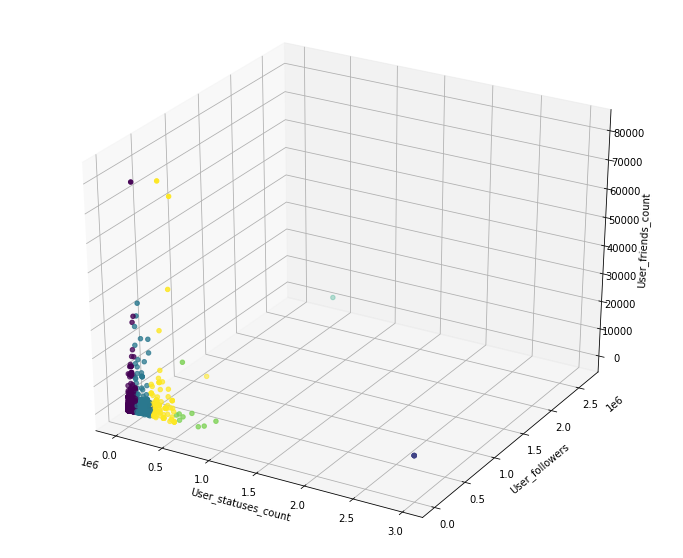

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

threedee = plt.figure(figsize=(12,10)).gca(projection = '3d')
threedee.scatter(pddf_pred.User_statuses_count , pddf_pred.User_followers , pddf_pred.User_friends_count , c=pddf_pred.cluster)
threedee.set_xlabel('User_statuses_count')
threedee.set_ylabel('User_followers')
threedee.set_zlabel('User_friends_count')
plt.show()